In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import os, ast
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
matplotlib.rcParams.update({'font.size': 15})

#### Dir of all images

In [2]:
rootDir = '/Users/josephking/Documents/sponsored_projects/MERGEN/data/vehicle_classifier'
orig_dir = pd.read_csv(os.path.join(rootDir, 'Vehicle Make Model Directory.csv'))

In [3]:
sample_stats = pd.DataFrame(columns=['Count'])

In [4]:
sample_stats = sample_stats.append({"Count": len(orig_dir)}, ignore_index=True) # Number of original images

#### Dir of images with bounding boxes that made the cut

In [5]:
rootDir = '/Users/josephking/Documents/sponsored_projects/MERGEN/data/vehicle_classifier'
veh_dir = pd.read_csv(os.path.join(rootDir, 'Vehicle Make Model Directory Bboxes.csv'))

# Convert str representation of bbox list to list
veh_dir['Bboxes'] = veh_dir['Bboxes'].apply(lambda x: list(ast.literal_eval(x)))

# Number of vehicles
veh_dir['Nr Veh'] = veh_dir['Bboxes'].apply(lambda x: len(x))

In [6]:
sample_stats = sample_stats.append({"Count": len(veh_dir)}, ignore_index=True) # Number of images with cars above threshold

In [7]:
sample_stats = sample_stats.append({"Count": veh_dir['Nr Veh'].sum()}, ignore_index=True) # Number of cars in above threshold across images

#### Cropped images

In [8]:
path = '/Users/josephking/Documents/sponsored_projects/MERGEN/data/vehicle_classifier/cropped'

In [9]:
contents = [i for i in os.listdir(path) if ".png" in i or ".jpg" in i]

In [10]:
sample_stats = sample_stats.append({"Count": len(contents)}, ignore_index=True) # Number of cropped images

In [11]:
sample_stats

,Count
0,30784
1,23006
2,40043
3,10567


In [12]:
sample_stats.index = ['Orig imgs', 'Imgs above thresh', 'Cars in thresh imgs', 'Cropped imgs*']

In [13]:
sample_stats.reset_index(inplace=True)

# Sample sizes

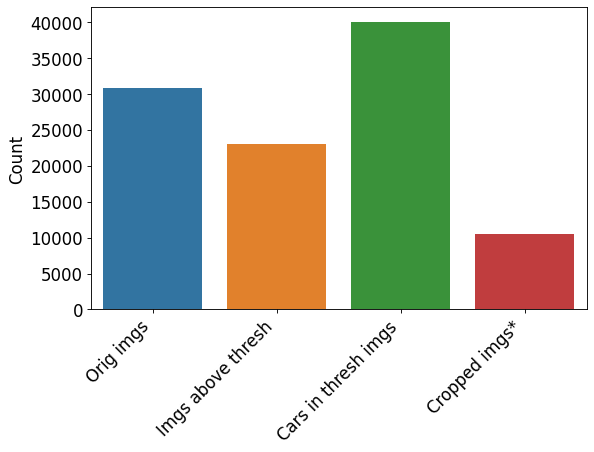

In [14]:
figure(figsize=(8, 5), dpi=80)
ax = sns.barplot(data=sample_stats, x='index', y='Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel(None)
plt.show()

#### Create dataframe for vehicle make/model analysis

In [15]:
foo = [i.split('_')[:3] for i in contents]

In [16]:
df = pd.DataFrame(foo, columns=['Make', 'Model', 'Years'])

In [17]:
df['Count'] = 1
agg = df.groupby(['Make', 'Model', 'Years'])['Count'].sum().reset_index()
del df['Count']

In [18]:
# View all 159 make/model/year combinations
agg

,Make,Model,Years,Count
0,Acura,MDX,2009-2020,44
1,Acura,RDX,2009-2020,22
2,Alfa Romeo,4C,2015-2019,3
3,Aston Martin,Vantage,2011-2019,54
4,Audi,A3,2010-2020,5
5,Audi,A4,2009-2019,33
6,Audi,A5,2009-2019,38
7,Audi,A6,2009-2020,8
8,Audi,A7,2012-2020,4
9,Audi,Q5,2009-2020,26


# Number of Images by Vehicle Make

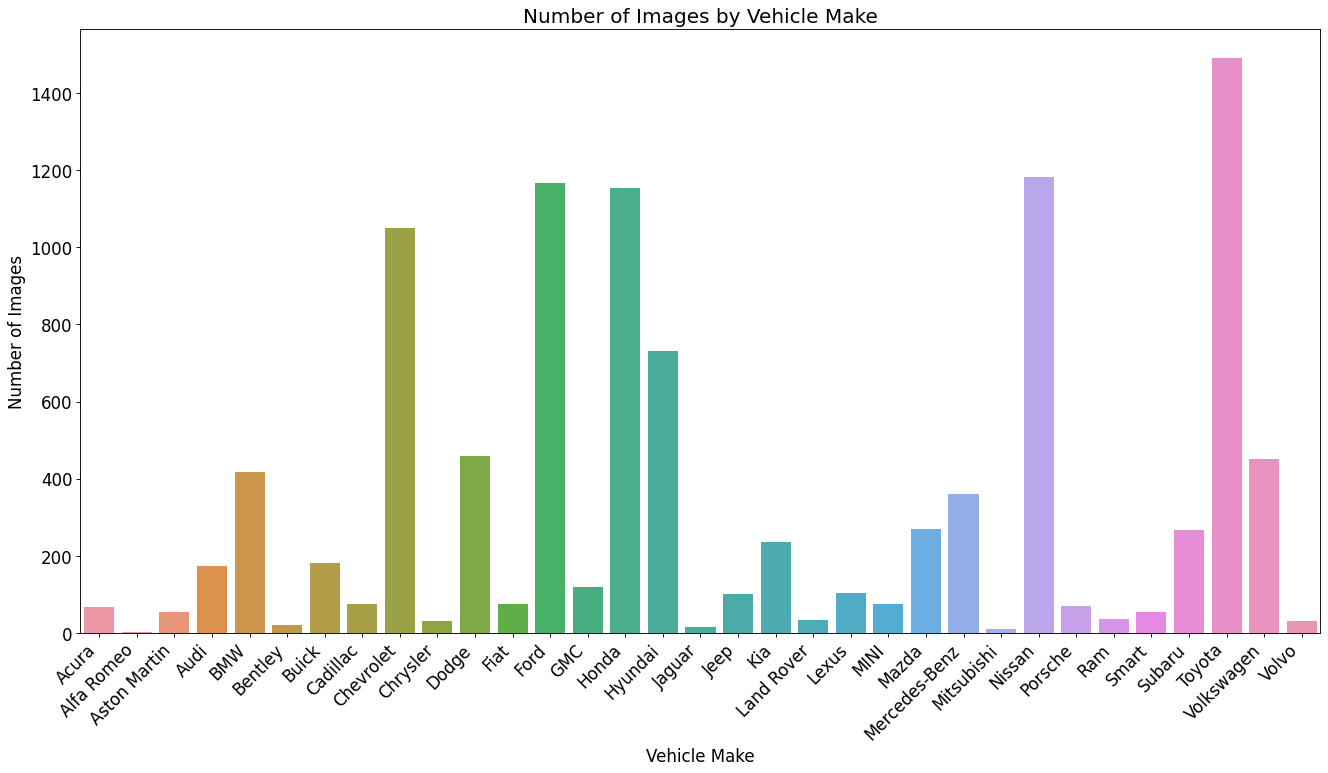

In [19]:
make = agg.groupby("Make")['Count'].sum().reset_index()
figure(figsize=(20, 10), dpi=80)
ax = sns.barplot(data=make, x='Make', y='Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Number of Images by Vehicle Make")
plt.xlabel("Vehicle Make")
plt.ylabel("Number of Images")
plt.show()

# Number of Models by Vehicle Make

In [20]:
model = agg.groupby('Make')['Model'].nunique().reset_index().rename(columns={"Model": "Count"})

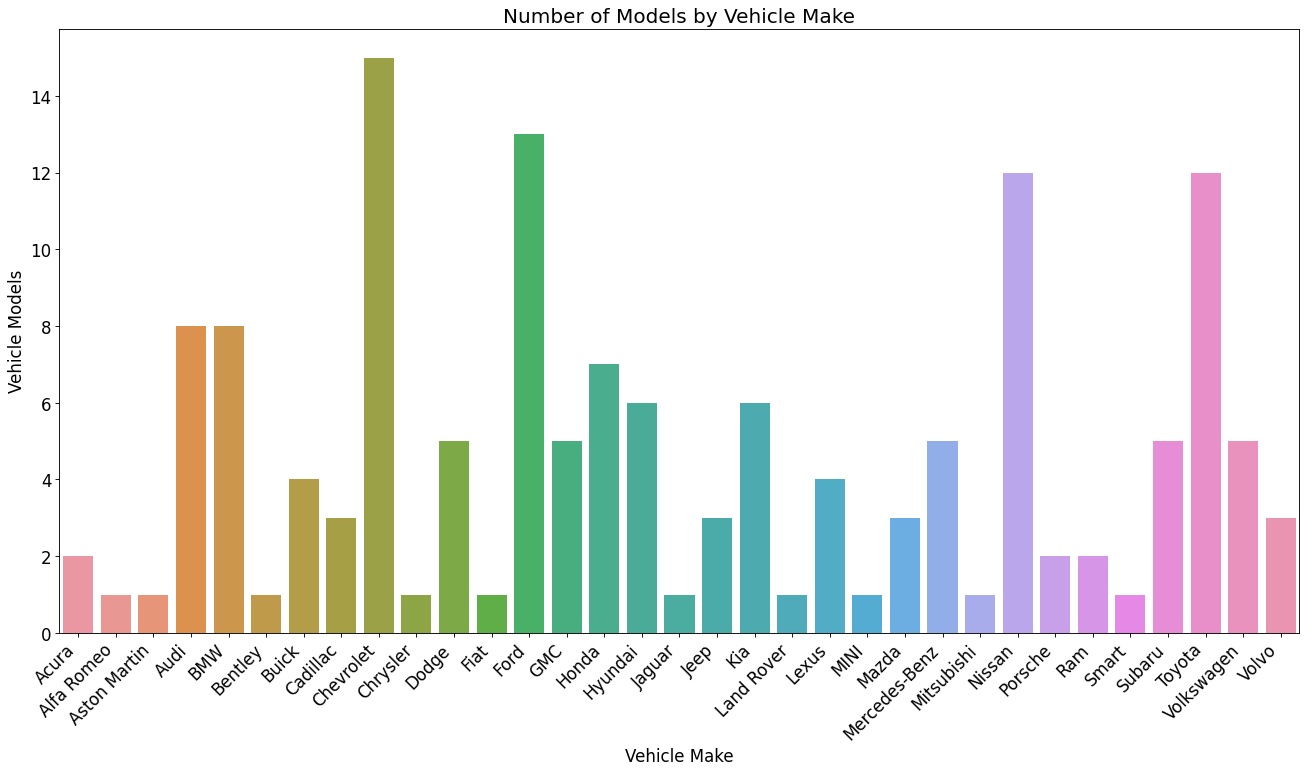

In [21]:
figure(figsize=(20, 10), dpi=80)
ax = sns.barplot(data=model, x='Make', y='Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Number of Models by Vehicle Make")
plt.ylabel("Vehicle Models")
plt.xlabel("Vehicle Make")
plt.show()